In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
import seaborn as sns

### TRAIN FILE ###

In [5]:
data_train = pd.read_csv('./HousingData_train.csv')

In [6]:
data_train.dropna(inplace=True)

In [7]:
X = data_train.drop('MEDV',axis=1)

In [8]:
y = data_train['MEDV']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [10]:
lm = LinearRegression()

In [11]:
lm.fit(X_train,y_train)

LinearRegression()

In [12]:
y_pred = lm.predict(X_test)

In [13]:
from sklearn import metrics 

#### MODEL EVALUATION ####

In [14]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 3.1791094039343593
MSE: 16.281802355670496
RMSE: 4.035071542819346


<AxesSubplot:xlabel='MEDV'>

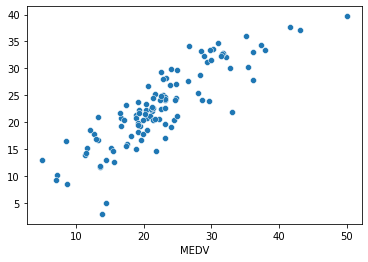

In [15]:
sns.scatterplot(x=y_test, y=y_pred) # tends to be lineal so y_pred ~ y_test -> ok

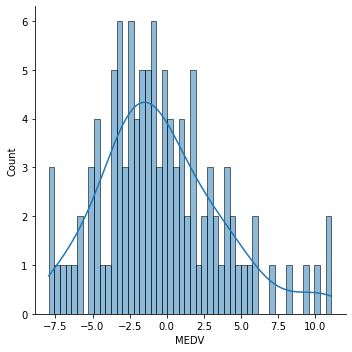

In [16]:
sns.displot(x=(y_test-y_pred),bins=50, kde=True); # residuals distribution tends to be normaly distributed -> ok

In [17]:
from joblib import dump

In [18]:
dump(lm, 'model.joblib') # Save model for the endpoint

['model.joblib']

#### TEST FILE ###

In [19]:
test_data = pd.read_csv('./HousingData_test.csv')

In [20]:
test_data.dropna(inplace=True)

In [21]:
y_pred2 = lm.predict(test_data)

In [22]:
test_data['predicted'] = y_pred2

In [23]:
test_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,predicted
0,9.39063,0.0,18.1,0.0,0.740,5.627,93.9,1.8172,24,666,20.2,396.90,22.88,13.178272
4,23.64820,0.0,18.1,0.0,0.671,6.380,96.2,1.3861,24,666,20.2,396.90,23.69,17.663181
5,17.86670,0.0,18.1,0.0,0.671,6.223,100.0,1.3861,24,666,20.2,393.74,21.78,18.059684
6,88.97620,0.0,18.1,0.0,0.671,6.968,91.9,1.4165,24,666,20.2,396.90,17.21,20.688549
7,15.87440,0.0,18.1,0.0,0.671,6.545,99.1,1.5192,24,666,20.2,396.90,21.08,19.518090


In [24]:
# since I do not have the target variable in the test data-set I could not print any metric